<h1>Análisando algoritmos de ordenamiento</h1>

In [1]:
import math
import numpy as np
import pylab as pl
%matplotlib inline

<h2>Problema de ordenamiento</h2>

Input:  $A[1..n] = <a_1,a_2\ldots, a_n>$

Output: $A'[1..n] = <a'_1,a'_2\ldots, a'_n> : a'_1\leq a'_2 \leq \ldots \leq  a'_n$

<h3> Ordenamiento por inserción </h3>

In [2]:
def insertion_sort(A):
    j = 1
    while j < len(A):
        key = A[j]
        i = j - 1
        while (i >= 0) and (A[i] > key):
            A[i + 1] = A[i]
            i = i -1
        A[i + 1] = key
        j = j + 1

In [3]:
B = np.random.permutation(range(0,10))
print B
insertion_sort(B)
print B

[1 6 3 0 9 4 8 5 7 2]
[0 1 2 3 4 5 6 7 8 9]


<h4>Correctitud</h4>

<b>Invariante:</b> Al comienzo de cada iteración del ciclo externo el subarreglo $A[0..j-1]$ consiste de los elementos originalmente en $A[0..j-1]$ pero ordenados.

In [4]:
def invariant(A, original_A):
    l1 = list(A)
    l2 = list(original_A)
    l2.sort()
    return l1 == l2

In [5]:
print invariant([1, 2, 3, 4], [4, 3, 2, 1])
print invariant([1, 2, 3, 4], [5, 3, 2, 1])

True
False


Algoritmo de ordenamiento por inserción incluyendo evaluación de la invariante (inicialización, mantenimiento, terminación)

In [6]:
def right_insertion_sort(A):
    original_A = list(A)
    j = 1
    assert invariant(A[0:j], original_A[0:j])
    while j < len(A):
        assert invariant(A[0:j], original_A[0:j])
        key = A[j]
        i = j - 1
        while (i >= 0) and (A[i] > key):
            A[i + 1] = A[i]
            i = i -1        
        A[i + 1] = key
        j = j + 1
    assert invariant(A[0:j], original_A[0:j])

In [7]:
B = [5, 4, 6, 3, 7, 2, 8, 1, 9]
right_insertion_sort(B)
print B

[1, 2, 3, 4, 5, 6, 7, 8, 9]


La siguiente función incluye un error, por lo tanto la aserción para comprobar el invariante de ciclo falla. Esto genera una excepción que es capturada para imprimir un mensaje y el estado de las variables.

In [8]:
def wrong_insertion_sort(A):
    original_A = list(A)
    j = 1
    try:
        assert invariant(A[0:j], original_A[0:j])
        while j < len(A):
            assert invariant(A[0:j], original_A[0:j])
            key = A[j]
            i = j - 1
            while (i >= 0) and (A[i] < key):
                A[i + 1] = A[i]
                i = i - 1        
            A[i + 1] = key
            j = j + 1
        assert invariant(A[0:j], original_A[0:j])
    except  AssertionError:
        print "Error en el invariante de ciclo!"
        print "j=", j
        print "i=", i
        print "A=", A
        print "Original A=", original_A

In [9]:
B = [5, 4, 6, 3, 7, 2, 8, 1, 9]
wrong_insertion_sort(B)

Error en el invariante de ciclo!
j= 2
i= 0
A= [5, 4, 6, 3, 7, 2, 8, 1, 9]
Original A= [5, 4, 6, 3, 7, 2, 8, 1, 9]


<h4> Análisis del tiempo de ejecución</h4>

In [11]:
class Counter:
    '''
    Class Counter
    Implements a step counter, which is used to compute the number of basic operations performed in
    a particular call to a function.
    '''
    def __init__(self):
        self.steps = 0

    def reset(self):
        self.steps = 0

    def count(self):
        self.steps += 1

    def print_steps(self):
        print "Number of steps =", self.steps
        
def acct_insertion_sort(A, acct):
    j = 1; acct.count()
    acct.count()
    while j < len(A):
        acct.count()
        key = A[j]; acct.count()
        i = j - 1; acct.count()
        acct.count()
        while (i >= 0) and (A[i] > key):
            acct.count()
            A[i + 1] = A[i]; acct.count()
            i = i -1; acct.count()
        A[i + 1] = key; acct.count()
        j = j + 1; acct.count()

In [12]:
B = np.random.permutation(range(0,10))
acct = Counter()
acct_insertion_sort(B, acct)
acct.print_steps()

Number of steps = 125


<h4>Análisis experimental</h4>
Ahora vamos a analizar el comportamiento del algoritmo cuando el tamaño de la entrada varía. La siguiente función genera arreglos al azar de tamaño 1 a n, llama la función acct_insertion_sort(l, acct) y contabiliza el número de pasos.

In [13]:
import random as rnd

def exper_analysis(n):
    results = []
    acct = Counter()
    for i in range(n):
        l = range(i)
        rnd.shuffle(l)
        acct.reset()
        acct_insertion_sort(l, acct)
        results.append(acct.steps)
    return results

In [14]:
print exper_analysis(10)

[2, 2, 8, 17, 32, 29, 53, 65, 71, 107]


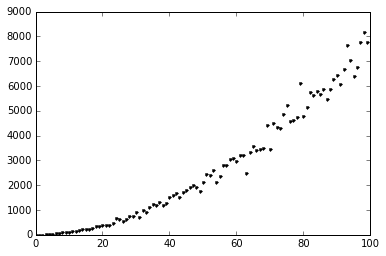

In [17]:
pl.clf()
x = np.arange(100)
y = np.array(exper_analysis(100))
pl.plot(x, y, 'k.')

#Actividad
 <ol>
  <li>En una sola gráfica represente el número de operaciones, tiempo y T(n) que el algoritmo de ordenamiento por inserción requiere para ordenar arreglos de tamaño n (varie n) en el peor de los casos.</li>
  <li>Replique los ejercicios realizados en este taller para el algoritmo de ordenamiento por mezclas (merge sort)</li>
  <li>Replique los ejercicios realizados en este taller para el algoritmo de ordenamiento quick-sort</li>
</ol> 

In [50]:
#Punto1

Analisis experimental para el numero de pasos: 
[2, 2, 8, 20, 29, 47, 47, 62, 113, 95]
Analisis experimental para el tiempo de ejecucion: 
[1.09999999997612e-05, 2.000000000279556e-06, 8.000000000230045e-06, 2.0000000000131024e-05, 2.9000000000500847e-05, 2.4999999999941735e-05, 4.000000000026205e-05, 3.300000000017178e-05, 5.100000000002325e-05, 7.300000000043383e-05]
Las operaciones se representan con la linea amarilla, el tiempo con la verde, y el T(n) por la azul:


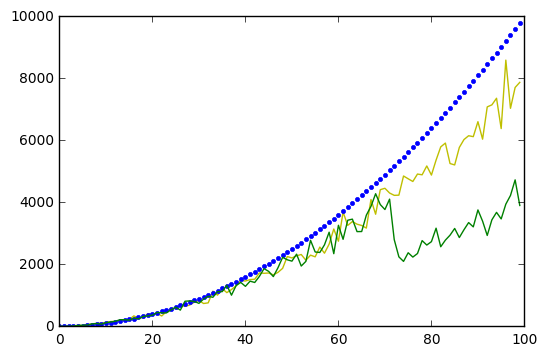

In [8]:
import math
import numpy as np
import pylab as pl
import time 
import random 

class Counter:
    '''
    Class Counter
    Implements a step counter, which is used to compute the number of basic operations performed in
    a particular call to a function.
    '''
    def __init__(self):
        self.steps = 0

    def reset(self):
        self.steps = 0

    def count(self):
        self.steps += 1

    def print_steps(self):
        print "Number of steps =", self.steps
        
        
def acct_insertion_sort(A, acct):
    j = 1; acct.count()
    acct.count()
    while j < len(A):
        acct.count()
        key = A[j]; acct.count()
        i = j - 1; acct.count()
        acct.count()
        while (i >= 0) and (A[i] > key):
            acct.count()
            A[i + 1] = A[i]; acct.count()
            i = i -1; acct.count()
        A[i + 1] = key; acct.count()
        j = j + 1; acct.count()
        
import random as rnd

print ("Analisis experimental para el numero de pasos: ")

def exper_analysis(n):
    results = []
    acct = Counter()
    for i in range(n):
        l = range(i)
        rnd.shuffle(l)
        acct.reset()
        acct_insertion_sort(l, acct)
        results.append(acct.steps)
    return results

print exper_analysis(10)

print ("Analisis experimental para el tiempo de ejecucion: ")

def exper_analysis_time(n):
    results = []
    acct = Counter()
    for i in range(n):
        l = range(i)
        rnd.shuffle(l)
        acct.reset()
        tic=time.clock()
        acct_insertion_sort(l, acct)
        toc=time.clock()
        tictoc=toc-tic
        results.append(tictoc)
    return results

print exper_analysis_time(10)

print ("Las operaciones se representan con la linea amarilla, el tiempo con la verde, y el T(n) por la azul:")

import pylab 
import math
pylab.clf()

a = np.arange(100)
b = np.array(exper_analysis(100))

x = np.arange(100)
y = np.array(exper_analysis_time(100))*800000

c = np.arange(100)
d = (c*c)

pylab.plot(a,b,'y-',c,d,'b.',x, y, 'g-',)
pylab.show()

In [5]:
#Punto2

In [6]:
import time
tic = time.clock()#get start time
toc = time.clock()#get final time

[1, 20, 29, 33, 44, 55, 56, 77, 83]
Number of steps = 232
('El tiempo de ejecucion del algoritmo fue: ', 0.00025399999999997647)
Analisis experimental para el numero de pasos: 
[0, 0, 21, 47, 72, 101, 135, 166, 197, 231]
Analisis experimental para el tiempo: 
[1.9999999993913775e-06, 1.9999999993913775e-06, 1.100000000064938e-05, 1.5999999999571912e-05, 2.4999999999941735e-05, 3.499999999956316e-05, 8.799999999986596e-05, 6.699999999959516e-05, 0.00010500000000046583, 0.00014700000000011926]
Las operaciones se representan con la linea amarilla, el tiempo con la verde, y el T(n) por la azul:


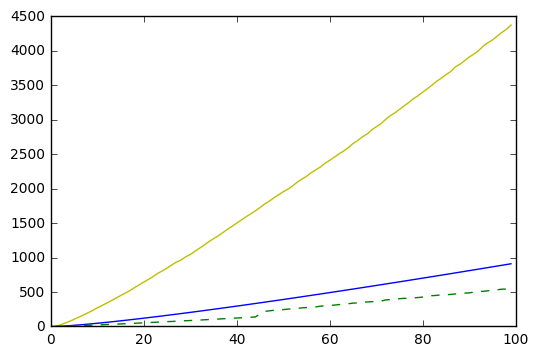

In [9]:
import math
import numpy as np
import pylab as pl
import time 
import random 

%matplotlib inline

class Counter:
    '''
    Class Counter
    Implements a step counter, which is used to compute the number of basic operations performed in
    a particular call to a function.
    '''
    def __init__(self):
        self.steps = 0

    def reset(self):
        self.steps = 0

    def count(self):
        self.steps += 1

    def print_steps(self):
        print "Number of steps =", self.steps

def mergeSort(alist,acct):
    if len(alist)>1:
        acct.count()   
        mid = len(alist)//2;acct.count()   
        lefthalf = alist[:mid];acct.count()   
        righthalf = alist[mid:];acct.count()   

        mergeSort(lefthalf,acct);acct.count()   
        mergeSort(righthalf,acct);acct.count()   

        i=0;acct.count()   
        j=0;acct.count()   
        k=0;acct.count()   
        acct.count()   
        while i < len(lefthalf) and j < len(righthalf):
            acct.count()   
            if lefthalf[i] < righthalf[j]:
                acct.count()   
                alist[k]=lefthalf[i];acct.count()   
                i=i+1;acct.count()   
            else:
                acct.count()   
                alist[k]=righthalf[j];acct.count()   
                j=j+1;acct.count()   
            k=k+1;acct.count()   
        acct.count()   
        while i < len(lefthalf):
            acct.count()   
            alist[k]=lefthalf[i];acct.count()   
            i=i+1;acct.count()   
            k=k+1;acct.count()   
        acct.count()   
        while j < len(righthalf):
            acct.count()   
            alist[k]=righthalf[j];acct.count()   
            j=j+1;acct.count()   
            k=k+1;acct.count()
    
   
lista = [1,56,33,44,77,29,83,55,20]
acct = Counter()
tic = time.clock()
mergeSort(lista,acct)
toc = time.clock()
tictoc=toc-tic
print (lista)
acct.print_steps()
print("El tiempo de ejecucion del algoritmo fue: ",tictoc)

print ("Analisis experimental para el numero de pasos: ")

def exper_analysis(n):
    results = []
    acct = Counter()
    for i in range(n):
        l = list(range(i))
        random.shuffle(l)
        acct.reset()
        mergeSort(l,acct)
        results.append(acct.steps)
    return results

print (exper_analysis(10))

print("Analisis experimental para el tiempo: ")

import time
def exper_analysis_time(n):
    results = []
    acct = Counter()
    for i in range(n):
        l = list(range(i))
        random.shuffle(l)
        acct.reset()
        tic = time.clock()
        mergeSort(l,acct)
        toc = time.clock()
        results.append((toc-tic))
    return results
print (exper_analysis_time(10))

print ("Las operaciones se representan con la linea amarilla, el tiempo con la verde, y el T(n) por la azul:")

import pylab  
import math
import numpy as np
pylab.clf()

a = np.arange(100)
b = np.array(exper_analysis(100))

x = np.arange(100)
y = np.array(exper_analysis_time(100))*100000

c = np.arange(1,100)
d = c*(np.log(c))*2

pylab.plot(a,b,'y-',c,d,'b-',x, y, 'g--')
pylab.show()

In [53]:
#Punto3

[0 1 2 3 4 5 6 7 8 9]
Number of steps = 150
('El tiempo de ejecucion del algoritmo fue: ', 0.0021279999999990196)
Analisis experimental para el numero de pasos: 
[0, 0, 16, 23, 51, 58, 67, 97, 101, 120]
Analisis experimental para el tiempo: 
[3.999999998782755e-06, 2.1000000000270802e-05, 2.200000000129876e-05, 4.500000000007276e-05, 4.6000000001100716e-05, 9.000000000014552e-05, 9.700000000023579e-05, 0.00010900000000013677, 0.00011600000000022703, 0.00015900000000002024]
Las operaciones se representan con la linea amarilla, el tiempo con la verde, y el T(n) por la azul:


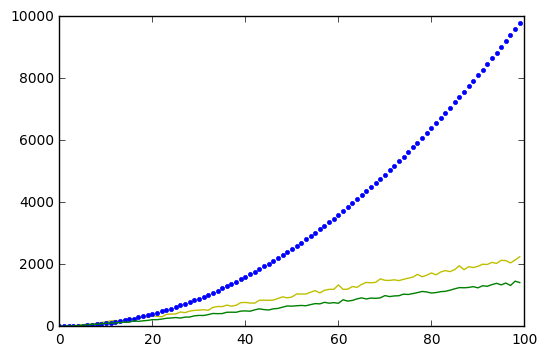

In [10]:
import math

import numpy as np
import pylab as pl
%matplotlib inline
import time


class Counter:
    '''
    Class Counter
    Implements a step counter, which is used to compute the number of basic operations performed in
    a particular call to a function.
    '''
    def __init__(self):
        self.steps = 0

    def reset(self):
        self.steps = 0

    def count(self):
        self.steps += 1

    def print_steps(self):
        print "Number of steps =", self.steps


def quickSort(alist,acct):
    quickSortHelper(alist,0,len(alist)-1,acct)

def quickSortHelper(alist,first,last,acct):
    if first<last:
        acct.count()
        splitpoint = partition(alist,first,last,acct) ; acct.count()

        quickSortHelper(alist,first,splitpoint-1,acct); acct.count()
        quickSortHelper(alist,splitpoint+1,last,acct); acct.count()
    

def partition(alist,first,last,acct):
    pivotvalue = alist[first]; acct.count()

    leftmark = first+1; acct.count()
    rightmark = last; acct.count()

    done = False; acct.count()
    while not done:
        acct.count()
        while leftmark <= rightmark and alist[leftmark] <= pivotvalue:
            leftmark = leftmark + 1 ; acct.count()
        acct.count()
        while alist[rightmark] >= pivotvalue and rightmark >= leftmark:
            rightmark = rightmark -1 ; acct.count()

        if rightmark < leftmark:
            acct.count()
            done = True; acct.count()
        else:
            acct.count()
            temp = alist[leftmark]; acct.count()
            alist[leftmark] = alist[rightmark]; acct.count()
            alist[rightmark] = temp; acct.count()

    temp = alist[first]; acct.count()
    alist[first] = alist[rightmark]; acct.count()
    alist[rightmark] = temp; acct.count()


    return rightmark; acct.count()

B = np.random.permutation(range(0,10))
acct = Counter()
tic = time.clock()
quickSort(B, acct)
print (B)
toc= time.clock()
tictoc=toc-tic
acct.print_steps()
print("El tiempo de ejecucion del algoritmo fue: ",tictoc)

print ("Analisis experimental para el numero de pasos: ")

import random as rnd

def exper_analysis(n):
    results = []
    acct = Counter()
    for i in range(n):
        l = range(i)
        rnd.shuffle(l)
        acct.reset()
        quickSort(l, acct)
        results.append(acct.steps)
    return results

print exper_analysis(10)

print("Analisis experimental para el tiempo: ")

def exper_analysis_time(n):
    results = []
    acct = Counter()
    for i in range(n):
        l = range(i)
        rnd.shuffle(l)
        acct.reset()
        tictoc2=0
        tic2=time.clock()
        quickSort(l, acct)
        toc2=time.clock()
        tictoc2=toc2-tic2
        results.append(tictoc2)
    return results;

print exper_analysis_time(10)

print ("Las operaciones se representan con la linea amarilla, el tiempo con la verde, y el T(n) por la azul:")

import pylab  
import math
import numpy as np
pylab.clf()


a = np.arange(100)
b = np.array(exper_analysis(100))

x = np.arange(100)
y = np.array(exper_analysis_time(100))*800000

c = np.arange(100)
d = (c*c)

pylab.plot(a,b,'y-',c,d,'b.',x, y, 'g-')
pylab.show()
